### 🖥️회귀 프로젝트 2: 콘크리트 강도 회귀 예측

#### 📚 Features

- cement: 시멘트(kg/m<sup>3</sup>)
- slag: 광재(kg/m<sup>3</sup>)
- ash: 비산회(시멘트 혼합제, kg/m<sup>3</sup>)
- water: 물(kg/m<sup>3</sup>)
- superplastic: 유동화제(kg/m<sup>3</sup>)
- coarseagg: 굵은 골재(kg/m<sup>3</sup>)
- fineagg: 잔골재(kg/m<sup>3</sup>)
- age: 콘크리트가 형성된 후 경과한 시간(1~365)

#### 🎈 Target

- strength: 콘크리트의 압축강도

---

#### 📌 목차

1. 데이터 탐색 및 전처리
2. 선형 회귀 분석
3. 다항 회귀 분석
4. 트리 기반 회귀 모델을 사용한 회귀 분석
5. OLS, VIF 확인
6. 과적합 확인을 위한 교차 검증 및 예측값/실제 정답 비교
7. 요약

#### 1. 데이터 탐색 및 전처리

In [1]:
import pandas as pd

c_df = pd.read_csv('./datasets/concrete.csv')
c_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


- 데이터의 정보를 확인해봅니다.

In [2]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


- 결측치가 없음을 확인할 수 있습니다.
- 중복행을 확인합니다.

In [3]:
c_df.duplicated().sum()

25

- 중복행을 삭제합니다.

In [4]:
pre_c_df = c_df.drop_duplicates()
pre_c_df.duplicated().sum()

0

In [5]:
pre_c_df = pre_c_df.reset_index(drop=True)
pre_c_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1000,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1001,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1002,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1003,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


- 데이터의 분포를 히스토그램으로 확인해봅니다.

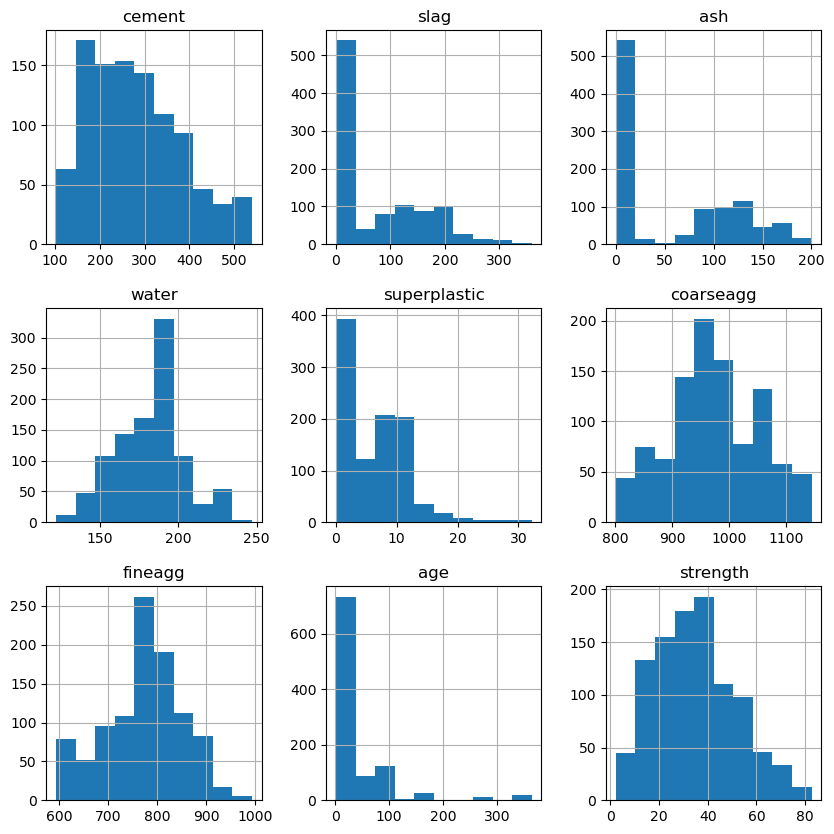

In [6]:
import matplotlib.pyplot as plt

pre_c_df.hist(figsize=(10, 10))
plt.show()

- corr()을 통해 상관관계를 확인하고, seaborn의 heatmap으로 시각화합니다.

In [7]:
corr = pre_c_df.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


- superplastic과 water 독립변수 간의 상관관계를 제외하면,   
  서로 간의 상관관계가 0.5 이상인 독립변수는 없었습니다.

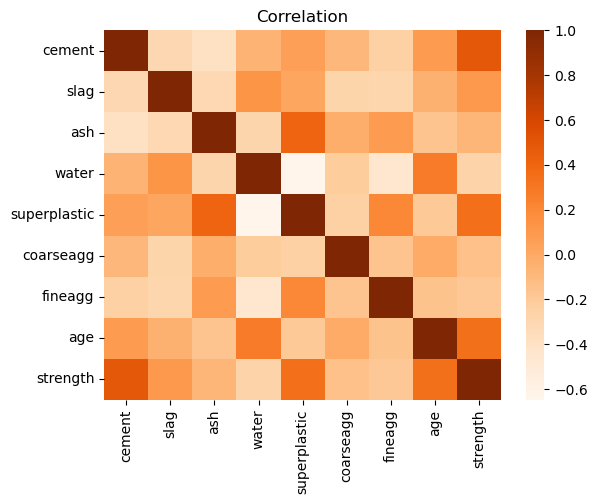

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_hmap = sns.heatmap(corr, cmap="Oranges")
corr_hmap.set_title('Correlation')
plt.show()

- 종속변수와의 상관관계가 어느 정도 나타나는 feature는 cement, superplastic, age 등이며,  
  수치로 확인하기 위해 내림차순으로 출력해봅니다.

In [9]:
corr['strength'].sort_values(ascending=False)[1:]

cement          0.488283
superplastic    0.344209
age             0.337367
slag            0.103374
ash            -0.080648
coarseagg      -0.144717
fineagg        -0.186448
water          -0.269624
Name: strength, dtype: float64

#### 2. 선형 회귀 분석
- 기초적인 전처리만 진행한 상태에서, sklearn의 선형 회귀 모델을 통해 회귀 분석을 수행해봅니다.

In [10]:
# Loss 평가 함수 정의
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [12]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 100.9549, RMSE: 10.0476, MSLE: 0.1098, RMSLE: 0.3314, R2: 0.5974


- 선형 회귀 분석을 수행했을 때 R<sup>2</sup>가 약 0.5974로 나타났습니다.
- R<sup>2</sup>만을 보고 비선형 데이터로 판단하기엔 무리가 있지만,  
  feature를 PolynomialFeature로 차원을 높여 회귀 예측을 수행해보고,  
  트리 기반 회귀 모델로도 회귀 예측을 수행해봄으로써 R<sup>2</sup>를 비교하여 데이터의 선형성을 판단해보고자 합니다.

#### 3. 다항(Polynomial) 회귀 분석

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]
poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [14]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 57.3214, RMSE: 7.5711, MSLE: 0.0582, RMSLE: 0.2413, R2: 0.7714


- 다항 회귀의 경우, PolynomialFeatures()의 하이퍼파라미터인 degree를 2로 설정하였을 때  
  R<sup>2</sup>가 약 0.7714로 가장 높았습니다(degree=3일 경우 약 0.7640으로 감소).
- 따라서 기존의 선형 회귀 모델을 사용하여 비선형 관계를 모델링하는 방법인 다항 회귀를 사용하여,  
  변수들을 다항식으로 변환하여 사용함으로써 비선형성을 적용하였을 때 R<sup>2</sup>가 약 0.2 가량 상승하였으므로,   해당 데이터를 비선형 데이터로 간주하는 것에 무리가 없음을 확인하였습니다.

#### 4. 트리 기반 회귀 모델을 사용한 회귀 분석
- 트리 기반 회귀 모델을 사용하여 회귀 분석을 수행하며, 사용할 모델은 아래와 같습니다.
    1. DecisionTreeRegressor
    2. RandomForestRegressor
    3. GradientBoostingRegressor
    4. XGBRegressor
    5. LGBMRegressor

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor(random_state=124)
lgb_r = LGBMRegressor(random_state=124)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 36.5240, RMSE: 6.0435, MSLE: 0.0401, RMSLE: 0.2003, R2: 0.8544
RandomForestRegressor
MSE: 25.1282, RMSE: 5.0128, MSLE: 0.0296, RMSLE: 0.1721, R2: 0.8998
GradientBoostingRegressor
MSE: 28.9575, RMSE: 5.3812, MSLE: 0.0333, RMSLE: 0.1826, R2: 0.8845
XGBRegressor
MSE: 17.8837, RMSE: 4.2289, MSLE: 0.0224, RMSLE: 0.1497, R2: 0.9287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 8
[LightGBM] [Info] Start training from score 35.265846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

- 각 모델별 RMSE(루트 평균 제곱 오차)와 R<sup>2</sup>는 아래와 같습니다.

1. DecisionTreeRegressor -     RMSE: 6.0435, R2: 0.8544    
2. RandomForestRegressor -     RMSE: 5.0128, R2: 0.8998      
3. GradientBoostingRegressor - RMSE: 5.3812, R2: 0.8845    
4. XGBRegressor -              RMSE: 4.2289, R2: 0.9287    
5. LGBMRegressor -             RMSE: 4.4983, R2: 0.9193

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


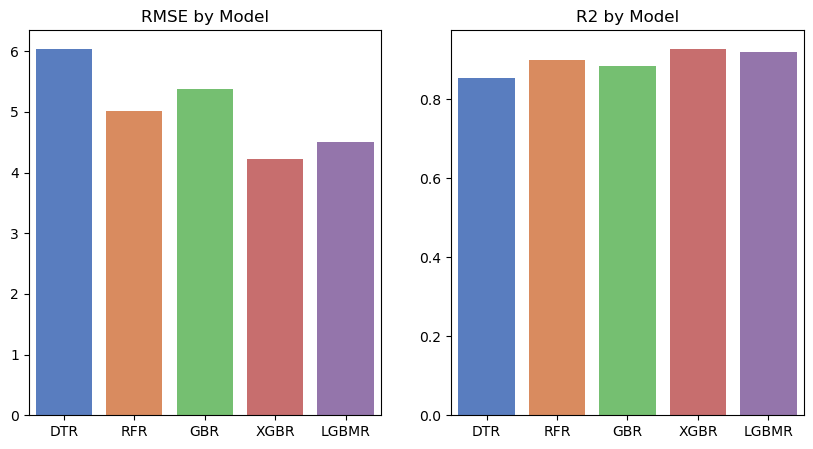

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

models = ['DTR', 'RFR', 'GBR', 'XGBR', 'LGBMR']
rmses = [6.0435, 5.0128, 5.3812, 4.2289, 4.4983]
r2s = [0.8544, 0.8998, 0.8845, 0.9287, 0.9193]

sns.barplot(x=models, y=rmses, palette='muted', ax=axes[0])
axes[0].set_title('RMSE by Model')
sns.barplot(x=models, y=r2s, palette='muted', ax=axes[1])
axes[1].set_title('R2 by Model')

plt.show()

- 이 중 XGBRegressor(XGBoost) 모델이 RMSE와 R<sup>2</sup> 기준 가장 좋은 성능을 보였으므로,  
  해당 모델을 사용하여 GridSearchCV를 통해 최적의 하이퍼파라미터를 찾아봅니다.

- XGBRegressor 모델이 선정한 feature별 중요도를 확인해봅니다.

In [17]:
import numpy as np

feature_importances = xgb_r.feature_importances_
for i, column in enumerate(pre_c_df.columns[:-1]):
    print(f'{column}의 중요도: {np.round(feature_importances[i] * 100, 4)}%')

cement의 중요도: 20.5022%
slag의 중요도: 15.0466%
ash의 중요도: 4.4085%
water의 중요도: 16.2507%
superplastic의 중요도: 13.0067%
coarseagg의 중요도: 2.804%
fineagg의 중요도: 6.0134%
age의 중요도: 21.9679%


In [18]:
xgb_r.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 124,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [19]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

xgb_r = XGBRegressor(random_state=124)

parameters = {
    'max_depth': [4, 8, 12, 20],
    'n_estimators': [50, 100, 500, 1000]
}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

grid_xgb_r = GridSearchCV(xgb_r, param_grid=parameters, scoring='r2', cv=kfold, n_jobs=-1)
grid_xgb_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=124, ...),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 20],
                         'n_estimators': [50, 100, 500, 1000]},
             scoring='r2')

In [20]:
result_df = pd.DataFrame(grid_xgb_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'n_estimators': 50}",0.908412,4
1,"{'max_depth': 4, 'n_estimators': 100}",0.915815,1
2,"{'max_depth': 4, 'n_estimators': 500}",0.915406,2
3,"{'max_depth': 4, 'n_estimators': 1000}",0.914842,3
4,"{'max_depth': 8, 'n_estimators': 50}",0.900526,8
5,"{'max_depth': 8, 'n_estimators': 100}",0.900670,5
6,"{'max_depth': 8, 'n_estimators': 500}",0.900588,6
7,"{'max_depth': 8, 'n_estimators': 1000}",0.900587,7
8,"{'max_depth': 12, 'n_estimators': 50}",0.893290,16
9,"{'max_depth': 12, 'n_estimators': 100}",0.893298,13


- GridSearchCV를 통해 확인해본 결과, max_depth가 작을 수록 대체로 R<sup>2</sup>가 상승하는 경향을 보였습니다.
- n_estimators는 대체로 100일 때 가장 높은 R<sup>2</sup>를 보였습니다.
- best_estimator_으로 가장 높은 R<sup>2</sup>를 기록한 하이퍼 파라미터 조합을 가진 모델을 가져와  
  테스트 데이터에 대한 예측을 수행하고 평가합니다.

In [21]:
xgb_r = grid_xgb_r.best_estimator_
prediction = xgb_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 17.3164, RMSE: 4.1613, MSLE: 0.0232, RMSLE: 0.1523, R2: 0.9309


- 테스트 데이터에 대한 회귀 예측 수행 결과 R<sup>2</sup>는 약 0.9309로 나타났습니다.
- 과적합의 우려가 있으므로, OLS와 VIF를 확인해봅니다.

#### 5. OLS 및 VIF 확인

In [22]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               strength   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              1665.
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        11:44:00   Log-Likelihood:                         -3764.6
No. Observations:                1005   AIC:                                      7545.
Df Residuals:                     997   BIC:                                      7585.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

- OLS 결과, R<sup>2</sup>는 약 0.930, Durbin-Watson은 약 1.862로 문제 없이 나타났습니다.
- 또한 각 독립변수의 P>|t| 값이 0.05를 넘지 않았으며 모두 0.003 이하로 나타났습니다.
- 이번에는 VIF를 통해 다중 공선성을 확인해봅니다.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [24]:
get_vif(features)

,vif_score,feature
0,15.143662,cement
1,3.260685,slag
2,4.170393,ash
3,81.401338,water
4,5.170736,superplastic
5,84.735483,coarseagg
6,72.490935,fineagg
7,1.696257,age


- water, coarseagg, fineagg의 VIF(다중공선성)가 높게 나타났으므로, 종속변수와의 상관관계를 확인해봅니다.

In [25]:
corr['strength'].sort_values(ascending=False)[1:]

cement          0.488283
superplastic    0.344209
age             0.337367
slag            0.103374
ash            -0.080648
coarseagg      -0.144717
fineagg        -0.186448
water          -0.269624
Name: strength, dtype: float64

- 세 개의 feature 모두 종속변수와의 상관관계가 낮으므로, 세 개의 feature를 제거하고 OLS와 VIF를 다시 확인해봅니다.

In [26]:
pre_c_df2 = pre_c_df.drop(labels=['coarseagg', 'fineagg', 'water'], axis=1)
pre_c_df2

,cement,slag,ash,superplastic,age,strength
0,141.3,212.0,0.0,0.0,28,29.89
1,168.9,42.2,124.3,10.8,14,23.51
2,250.0,0.0,95.7,5.5,28,29.22
3,266.0,114.0,0.0,0.0,28,45.85
4,154.8,183.4,0.0,9.1,28,18.29
...,...,...,...,...,...,...
1000,135.0,0.0,166.0,10.0,28,13.29
1001,531.3,0.0,0.0,28.2,3,41.30
1002,276.4,116.0,90.3,8.9,28,44.28
1003,342.0,38.0,0.0,0.0,270,55.06


In [27]:
from statsmodels.api import OLS

features, targets = pre_c_df2.iloc[:, :-1], pre_c_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               strength   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              2301.
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        11:44:00   Log-Likelihood:                         -3834.1
No. Observations:                1005   AIC:                                      7678.
Df Residuals:                    1000   BIC:                                      7703.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

- feature 3개를 제거한 후 OLS 수행 결과 여전히 R<sup>2</sup>와 Durbin-Watson이 높은 수치를 보였습니다.
- 다음으로는 VIF를 확인해봅니다.

In [28]:
get_vif(features)

,vif_score,feature
0,2.718666,cement
1,1.474251,slag
2,1.972360,ash
3,2.898519,superplastic
4,1.545505,age


- 모든 feature의 VIF 수치가 3 미만으로, 다중공선성이 크게 줄어들었음을 알 수 있습니다.
- 현재 상태에서 다시 XGBRegressor 모델로 회귀예측을 수행해봅니다.

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pre_c_df2.iloc[:, :-1], pre_c_df2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

xgb_r = XGBRegressor(random_state=124)

parameters = {
    'max_depth': [4, 8, 12, 20],
    'n_estimators': [50, 100, 500, 1000]
}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

grid_xgb_r = GridSearchCV(xgb_r, param_grid=parameters, scoring='r2', cv=kfold, n_jobs=-1)
grid_xgb_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=124, ...),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 20],
                         'n_estimators': [50, 100, 500, 1000]},
             scoring='r2')

In [30]:
result_df = pd.DataFrame(grid_xgb_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'n_estimators': 50}",0.884376,4
1,"{'max_depth': 4, 'n_estimators': 100}",0.892180,2
2,"{'max_depth': 4, 'n_estimators': 500}",0.892394,1
3,"{'max_depth': 4, 'n_estimators': 1000}",0.891011,3
4,"{'max_depth': 8, 'n_estimators': 50}",0.875976,5
5,"{'max_depth': 8, 'n_estimators': 100}",0.875325,6
6,"{'max_depth': 8, 'n_estimators': 500}",0.874697,7
7,"{'max_depth': 8, 'n_estimators': 1000}",0.874696,8
8,"{'max_depth': 12, 'n_estimators': 50}",0.869266,9
9,"{'max_depth': 12, 'n_estimators': 100}",0.869235,12


In [31]:
xgb_r = grid_xgb_r.best_estimator_
prediction = xgb_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 18.8915, RMSE: 4.3464, MSLE: 0.0214, RMSLE: 0.1462, R2: 0.9247


- 3개의 feature를 제거하기 전의 R<sup>2</sup>는 약 0.9309, 제거 후에는 약 0.9247로 나타났으며,  
  제거 전의 RMSE는 약 4.1613, 제거 후에는 약 4.3464로 나타났습니다.
- feature를 제거하기 전에도 OLS 상으로는 특이할 점이 없었다고 볼 수 있었으나,  
  제거한 3개의 feature가 높은 다중공선성을 보이고 있었다는 점에서 제거 후 R<sup>2</sup>에서의 약 0.006 감소는  
  오히려 더 높은 신뢰도를 가진 회귀 모델로 판단됩니다.

#### 6. 과적합 확인을 위한 교차 검증 및 예측값/실제 정답 비교
- 먼저 교차 검증을 통해 R<sup>2</sup>을 비교해봅니다.

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold


kfold = KFold(n_splits=10, shuffle=True, random_state=124)
xgb_r = XGBRegressor(max_depth=4, n_estimators=500, random_state=124)
score = cross_val_score(xgb_r, X_train, y_train, cv=kfold, scoring='r2')
print(score)
print(np.round(np.mean(score), 4))

[0.92492921 0.89580047 0.88439864 0.916557   0.89151043 0.86669529
 0.82147609 0.86831745 0.93466811 0.91958361]
0.8924


In [36]:
xgb_r.fit(X_train, y_train)
prediction = xgb_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 18.8915, RMSE: 4.3464, MSLE: 0.0214, RMSLE: 0.1462, R2: 0.9247


- 교차 검증 시의 평균 R<sup>2</sup>은 약 0.8924, 실제 예측 시의 R<sup>2</sup>는 약 0.9247로, 교차 검증에서는 과적합이 발견되지 않았습니다.

- 과적합 여부를 판단하기 위해 각 데이터에 대한 모델의 예측값과 실제 정답의 분포를 시각화합니다.

MSE: 1.8634, RMSE: 1.3651, MSLE: 0.0022, RMSLE: 0.0469, R2: 0.9931
MSE: 18.8915, RMSE: 4.3464, MSLE: 0.0214, RMSLE: 0.1462, R2: 0.9247


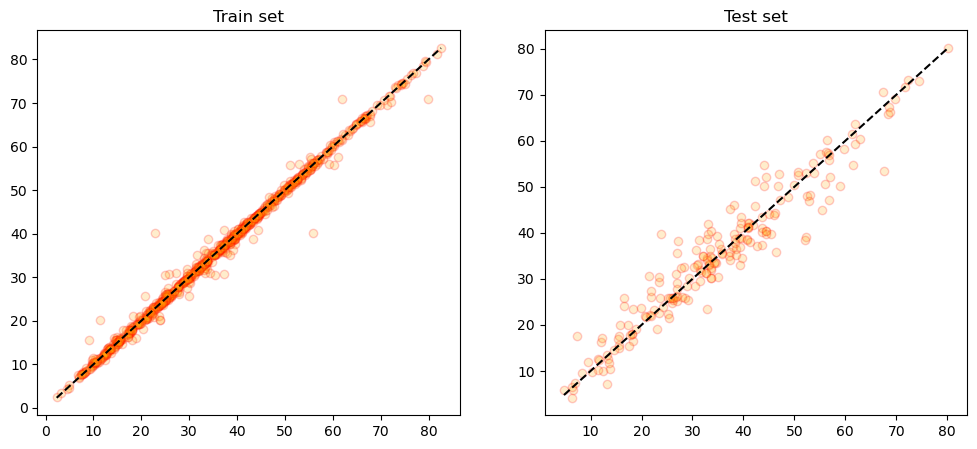

In [40]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

xgb_r = XGBRegressor(max_depth=4, n_estimators=500, random_state=124)
xgb_r.fit(X_train, y_train)

prediction = xgb_r.predict(X_train)
get_evaluation(y_train, prediction)

axes[0].scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axes[0].set_title('Train set')

prediction = xgb_r.predict(X_test)
get_evaluation(y_test, prediction)

axes[1].scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[1].set_title('Test set')
plt.show()

- 학습데이터에 대한 모델의 예측값과 실제 정답, 그리고 테스트 데이터에 대한 모델의 예측값과 실제 정답을 비교해본 결과,  
  시각화 자료 및 평가 지표에서 확인할 수 있듯 학습 데이터에서는 R<sup>2</sup>가 약 0.99, 테스트 데이터에서는 약 0.92로 나타남으로써,  
  과적합 발생을 의심해볼 수 있습니다.
- 따라서 `best_estimator_`가 아닌, GridSearchCV에서 12위를 기록한 하이퍼파라미터 조합으로 모델을 생성하여 학습 및 예측을 수행해봅니다.

MSE: 1.6297, RMSE: 1.2766, MSLE: 0.0018, RMSLE: 0.0424, R2: 0.9939
MSE: 30.3917, RMSE: 5.5129, MSLE: 0.0365, RMSLE: 0.1911, R2: 0.8788


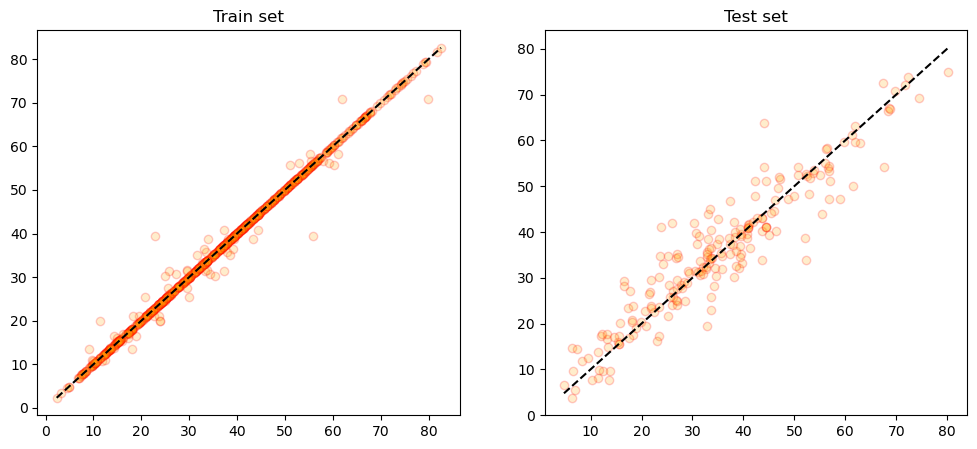

In [39]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

xgb_r = XGBRegressor(max_depth=20, n_estimators=50, random_state=124)
xgb_r.fit(X_train, y_train)

prediction = xgb_r.predict(X_train)
get_evaluation(y_train, prediction)

axes[0].scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axes[0].set_title('Train set')

prediction = xgb_r.predict(X_test)
get_evaluation(y_test, prediction)

axes[1].scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[1].set_title('Test set')
plt.show()

- GridSearchCV를 통해 교차 검증 수행 후 평균 R<sup>2</sup>가 더 낮은 모델로 학습을 진행한 후,  
  학습 데이터에 대한 예측값/실제 정답 및 테스트 데이터에 대한 예측값/실제 정답을 비교하여 시각화한 결과,
  `best_estimator_`과 같은 하이퍼파라미터 조합을 가진 모델을 사용했을 때 테스트 데이터에 대한 R<sup>2</sup>가 더 높았습니다.
- 테스트 데이터에 대한 R<sup>2</sup>가 약 0.8788로 감소함에 따라, 이전의 모델 학습에서 과적합이 발생하지 않았다는 사실을 알 수 있습니다.
- 따라서 `XGBRegressor(max_depth=4, n_estimators=500, random_state=124)` 모델이 가장 적합한 성능을 보였다고 결론 지을 수 있겠습니다.

#### **📌 6. 요약**

- 중복행 삭제 등 기본적인 전처리만 수행한 후, 상관관계를 시각화하고 수치로 확인해보았습니다.
- 대체로 독립변수 간의 상관관계는 0.5 미만이었으며,  
  종속변수와의 상관관계는 0.5를 넘는 독립변수는 없었습니다.
- 이후 sklearn의 LinearRegression 모델을 통해 선형 회귀 예측을 수행했을 때 R<sup>2</sup>가 약 0.5974로,  
  해당 데이터를 비선형 데이터로 간주할 만큼 낮은 수치는 아니었지만 다항 회귀를 진행해보기로 했습니다.
- 다항 회귀 분석 결과 R<sup>2</sup>는 차수가 2일 때 약 0.7714로 확실히 높아진 수치를 보였습니다.
- 따라서 분석 대상 데이터를 비선형 데이터로 간주하는 데 무리가 없다고 판단하였고,  
  트리 기반 회귀 모델로 회귀 분석을 진행하였습니다.
- 이 때, XGBRegressor가 RMSE는 약 4.2289, R<sup>2</sup>는 약 0.9287로 가장 좋은 성능을 보였습니다.
- 따라서 GridSearchCV를 통해 최적의 하이퍼 파라미터 조합을 찾아 회귀 예측을 수행하였고,  
  약 0.9309의 R<sup>2</sup>를 보였습니다.
- 과적합의 우려가 있다고 판단하여 OLS 및 VIF를 확인한 결과, OLS 상에서는 문제를 발견하지 못했습니다.
- 다만, VIF에서 3개의 feature가 종속변수와의 상관관계도 낮고 다중공선성이 매우 높게 나타났습니다.
- 따라서 해당 feature들을 제거한 후 다시 GridSearchCV를 통해 XGBRegressor로 회귀 예측을 수행하였고,  
  이 때 R<sup>2</sup>는 약 0.9247로 약 0.006 가량 감소하였지만 다중공선성 문제가 해결되었다는 점에서  
  보다 신뢰성 있는 회귀 예측 모델로 평가할 수 있겠습니다.
- 추가로 과적합 확인을 위해 교차 검증을 수행한 결과, `cross_val_score()`를 통한 교차 검증에서는 문제가 발견되지 않았습니다.
- 하지만 학습 데이터에 대한 예측값/실제 정답 및 테스트 데이터에 대한 예측값/실제 정답을 시각화한 결과,  
  테스트 데이터에서의 R<sup>2</sup>가 학습 데이터(약 0.99)보다 낮았습니다(약 0.92).
- 따라서 `best_estimator_`가 아닌, GridSearchCV에서 더 낮은 성능을 보인 모델로 학습을 진행하였으나,  
  이때 테스트 데이터에서의 R<sup>2</sup>는 약 0.88로 더 떨어지는 양상을 보였습니다.
- 즉, `best_estimator_`모델에서 과적합이 발생했다고 보기 어려우며, 가장 적합한 모델로 평가할 수 있습니다.